# US Population Growth

<br>**(a)** Import the data and create two new columns. Create one column that is the number of years
since 1790. Create another column that is the population in millions.
<br>**(b)** Plot the US population (in millions) versus the years since 1790.
<br>**(c)** Create a linear regression model to predict the US population (in millions) t years from 1790.
Find and report the R2-value of this model.
<br>**(d)** Create another new column in your data by squaring the number of years since 1790.
<br>**(e)** Run another linear regression, where your input feature is the square of the number of years since 1790. Find and report the R2-value of this model.
<br>**(f)** Plot the models you built on top of the data. Which one fits the data better? Is this apparent in
your R2-values. Explain.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Load the data
pop_df = pd.read_csv('us_pop_data.csv') 
pop_df.describe()

,year,us_pop
count,23.0000,2.300000e+01
mean,1900.0000,1.039909e+08
std,67.8233,9.617953e+07
min,1790.0000,3.929326e+06
25%,1845.0000,2.013066e+07
50%,1900.0000,7.621217e+07
75%,1955.0000,1.650103e+08
max,2010.0000,3.087455e+08


In [20]:

# Step 2: Create new columns
pop_df['Years_Since_1790'] = pop_df['year'] - 1790
pop_df['Population_Millions'] = pop_df['us_pop'] / 1e6
pop_df.describe()

,year,us_pop,Years_Since_1790,Population_Millions
count,23.0000,2.300000e+01,23.0000,23.000000
mean,1900.0000,1.039909e+08,110.0000,103.990856
std,67.8233,9.617953e+07,67.8233,96.179533
min,1790.0000,3.929326e+06,0.0000,3.929326
25%,1845.0000,2.013066e+07,55.0000,20.130665
50%,1900.0000,7.621217e+07,110.0000,76.212168
75%,1955.0000,1.650103e+08,165.0000,165.010268
max,2010.0000,3.087455e+08,220.0000,308.745538


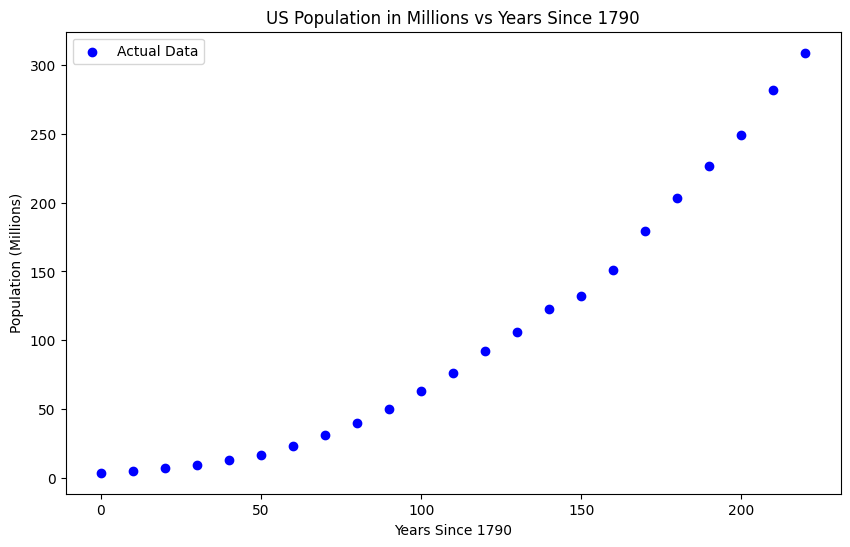

R2 value of the linear model: 0.9192437447080442
R2 value of the quadratic model: 0.9984915694986646


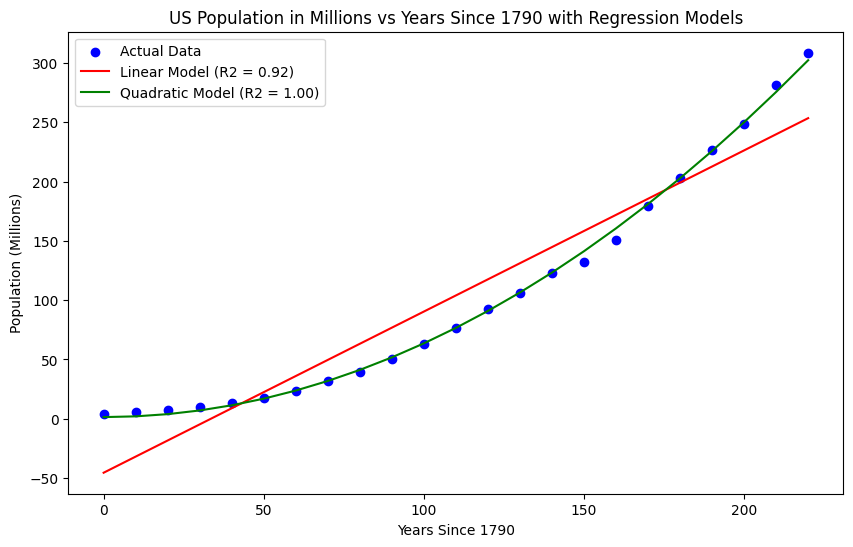

In [21]:

# Step 3: Plot the US population (in millions) versus the years since 1790
plt.figure(figsize=(10, 6))
plt.scatter(pop_df['Years_Since_1790'], pop_df['Population_Millions'], color='blue', label='Actual Data')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (Millions)')
plt.title('US Population in Millions vs Years Since 1790')
plt.legend()
plt.show()

# Step 4: Create a linear regression model
X = pop_df['Years_Since_1790'].values.reshape(-1, 1)
y = pop_df['Population_Millions'].values

linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)
r2_linear = r2_score(y, y_pred_linear)

# Step 5: Create a new column by squaring the number of years since 1790
pop_df['Years_Since_1790_Squared'] = pop_df['Years_Since_1790'] ** 2

# Step 6: Create a linear regression model with squared years as input
X_squared = pop_df['Years_Since_1790_Squared'].values.reshape(-1, 1)
quadratic_model = LinearRegression()
quadratic_model.fit(X_squared, y)
y_pred_quadratic = quadratic_model.predict(X_squared)
r2_quadratic = r2_score(y, y_pred_quadratic)

# Print R2 values
print(f'R2 value of the linear model: {r2_linear}')
print(f'R2 value of the quadratic model: {r2_quadratic}')

# Step 7: Plot the models on top of the data
plt.figure(figsize=(10, 6))
plt.scatter(pop_df['Years_Since_1790'], pop_df['Population_Millions'], color='blue', label='Actual Data')
plt.plot(pop_df['Years_Since_1790'], y_pred_linear, color='red', label=f'Linear Model (R2 = {r2_linear:.2f})')
plt.plot(pop_df['Years_Since_1790'], y_pred_quadratic, color='green', label=f'Quadratic Model (R2 = {r2_quadratic:.2f})')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (Millions)')
plt.title('US Population in Millions vs Years Since 1790 with Regression Models')
plt.legend()
plt.show()


# Customer Spending Data
(a) Make a histogram of the customer spending amounts.
(b) Make a new data set that is a log transformation of the customer spending amounts.
(c) Make a histogram of the log transformed dataset.
(d) Compare the two histograms. Discuss why it might be useful to apply a log transformation to
this data for modeling purposes.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
cust_df = pd.read_csv('customer_spending.csv') 
cust_df.describe()




,ann_spending
count,440.000000
mean,33226.136364
std,26356.301730
min,904.000000
25%,17448.750000
50%,27492.000000
75%,41307.500000
max,199891.000000


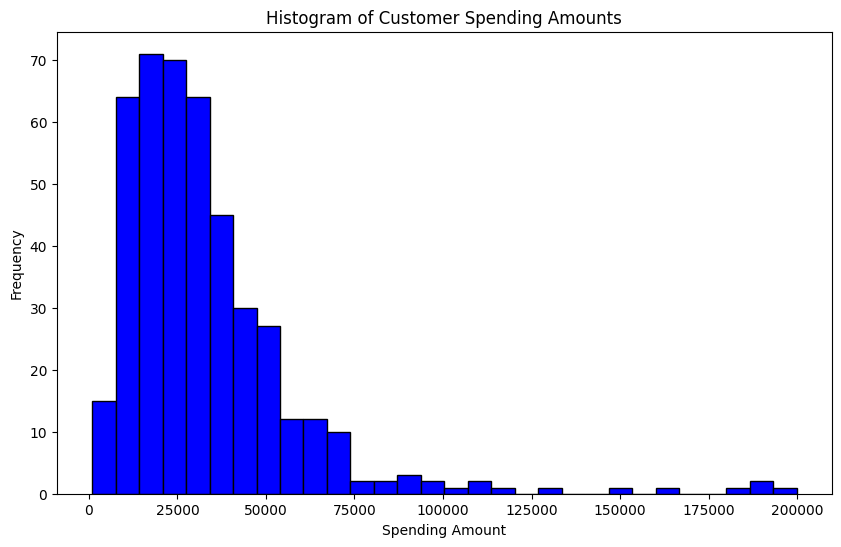

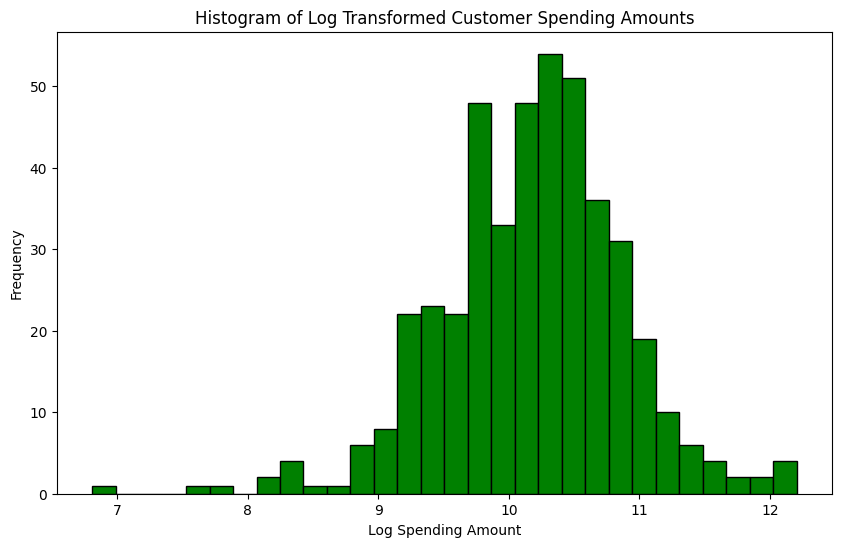

In [23]:
# Step (a): Create a histogram of customer spending amounts
plt.figure(figsize=(10, 6))
plt.hist(cust_df['ann_spending'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Spending Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Spending Amounts')
plt.show()

# Step (b): Log transform the customer spending amounts
cust_df['Log_Spending'] = np.log(cust_df['ann_spending'])

# Step (c): Create a histogram of the log-transformed dataset
plt.figure(figsize=(10, 6))
plt.hist(cust_df['Log_Spending'], bins=30, color='green', edgecolor='black')
plt.xlabel('Log Spending Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Log Transformed Customer Spending Amounts')
plt.show()



### Comparing Histograms:<br>
The first histogram shows the distribution of customer spending amounts.
<br>The second histogram shows the distribution of the log-transformed customer spending amounts.
<br>Log transformation can help normalize the data, reducing skewness, and making it more suitable for modeling.